## Summary

This notebook contains various analyses performed on `Premium` data during `2023-09-01` and `2023-09-10`.  It includes an exploratory data analysis, time series analysis, segmentation analysis, correlation analysis, and (explotary) anomaly detection results.


- Exploratory Data Analysis (EDA): The initial section covers the basics of the dataset, including the first few rows of data, information on non-null counts and data types, descriptive statistics, and missing value counts.

- Time Series Analysis: A time series analysis is executed for multiple metrics, plotting the mean values over time.

- Segmentation Analysis: The report segments data based on 'MERCH_CLASSIFICATION3', aggregates various metrics, and provides a sorted view based on 'TOTAL_UNITS'.

- Correlation Analysis: Correlations between various numeric metrics are examined to identify strong and weak relationships.

- Anomaly Detection: Anomalies are detected using statistical methods, including Z-Score, and machine learning methods, specifically the Isolation Forest algorithm.

**Takeaways:**

- Sales and Stock Relationship: A strong link was observed between the amount of stock on hand and the total units sold, suggesting good inventory management.
- Customer Engagement: Higher customer visits and unique customer counts are associated with more product interactions, which could potentially drive sales.
- Product Visibility: Products with higher view counts and interaction rates tend to have better sales, highlighting the importance of product visibility.
- Ratings Impact: The number of product ratings shows a moderate relationship with sales, indicating that products with more ratings may be more trusted and purchased by customers.
- Anomaly Identification: Applying statistical and machine learning methods has helped flag potential anomalies that may warrant further investigation for irregularities in sales or customer behavior.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose



import warnings
import os
import sys


root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import *
from utils.constant import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
# Set a seed for reproducibility
np.random.seed(42)


In [2]:
file_path = get_absolute_path(
    'one_week.csv',
    'data',
    PROJECT_BASE_DIR
)

one_week_data = pd.read_csv(file_path)

In [3]:
one_week_data.head()

,PRICE_SNAPSHOT_DATE,CATEGORY_LEVEL1,CATEGORY_LEVEL2,CATEGORY_LEVEL3,MERCH_CLASSIFICATION1,MERCH_CLASSIFICATION2,MERCH_CLASSIFICATION3,LIST_PRICE,RATING_AVG,RATING_CNT,PRODUCT_PART_NUMBER,TOTAL_UNITS,TOTAL_CURRENT_ON_HAND,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER
0,2023-09-04,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.677034,0.0,0,1000000838,0.0,0,0,0,0,0
1,2023-09-05,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.680796,0.0,0,1000000838,0.0,0,0,0,0,0
2,2023-09-06,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.575460,0.0,0,1000000838,0.0,0,0,0,0,0
3,2023-09-07,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.586746,0.0,0,1000000838,0.0,0,0,0,0,0
4,2023-09-08,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.488934,0.0,0,1000000838,0.0,0,0,0,0,0


In [4]:
one_week_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120498 entries, 0 to 120497
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   PRICE_SNAPSHOT_DATE           120498 non-null  object 
 1   CATEGORY_LEVEL1               120498 non-null  object 
 2   CATEGORY_LEVEL2               120498 non-null  object 
 3   CATEGORY_LEVEL3               120498 non-null  object 
 4   MERCH_CLASSIFICATION1         120498 non-null  object 
 5   MERCH_CLASSIFICATION2         120498 non-null  object 
 6   MERCH_CLASSIFICATION3         120498 non-null  object 
 7   LIST_PRICE                    104171 non-null  float64
 8   RATING_AVG                    120498 non-null  float64
 9   RATING_CNT                    120498 non-null  int64  
 10  PRODUCT_PART_NUMBER           120498 non-null  int64  
 11  TOTAL_UNITS                   120498 non-null  float64
 12  TOTAL_CURRENT_ON_HAND         120498 non-nul

### Descriptive

In [5]:
# Descriptive statistics
descriptive_stats = one_week_data.describe()

# Check for missing values
missing_values = one_week_data.isnull().sum()

print(descriptive_stats)
print(missing_values)


          LIST_PRICE     RATING_AVG     RATING_CNT  PRODUCT_PART_NUMBER  \
count  104171.000000  120498.000000  120498.000000         1.204980e+05   
mean       44.868818       3.641640      80.626309         5.879398e+07   
std        31.583818       1.440005     143.724219         2.346575e+08   
min         1.490000       0.000000       0.000000         4.536700e+04   
25%        23.880000       3.650000       6.000000         9.203800e+04   
50%        37.990000       4.132600      29.000000         2.139340e+05   
75%        55.990000       4.450000      88.000000         5.725900e+05   
max       342.930000       5.000000    1674.000000         1.000059e+09   

         TOTAL_UNITS  TOTAL_CURRENT_ON_HAND  NUM_DISTINCT_UNIQUE_VISIT_ID  \
count  120498.000000          120498.000000                 120498.000000   
mean       10.123338             408.575819                    204.621653   
std        25.274319            1001.917952                    525.183980   
min         0.00

In [6]:
one_week_data.dropna()

,PRICE_SNAPSHOT_DATE,CATEGORY_LEVEL1,CATEGORY_LEVEL2,CATEGORY_LEVEL3,MERCH_CLASSIFICATION1,MERCH_CLASSIFICATION2,MERCH_CLASSIFICATION3,LIST_PRICE,RATING_AVG,RATING_CNT,PRODUCT_PART_NUMBER,TOTAL_UNITS,TOTAL_CURRENT_ON_HAND,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER
0,2023-09-04,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.677034,0.00,0,1000000838,0.0,0,0,0,0,0
1,2023-09-05,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.680796,0.00,0,1000000838,0.0,0,0,0,0,0
2,2023-09-06,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.575460,0.00,0,1000000838,0.0,0,0,0,0,0
3,2023-09-07,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.586746,0.00,0,1000000838,0.0,0,0,0,0,0
4,2023-09-08,Dog,Food,Wet Food Toppings,Premium,Pantry,Wet Food Toppings,27.488934,0.00,0,1000000838,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120493,2023-09-27,Dog,Food,Wet Food,Premium,Pantry,Wet Food,50.280000,4.08,25,99826,1.0,38,41,28,44957,66
120494,2023-09-28,Dog,Food,Wet Food,Premium,Pantry,Wet Food,50.280000,4.08,25,99826,2.0,37,56,42,35642,78
120495,2023-09-29,Dog,Food,Wet Food,Premium,Pantry,Wet Food,50.280000,4.08,25,99826,1.0,35,43,30,49457,142
120496,2023-09-30,Dog,Food,Wet Food,Premium,Pantry,Wet Food,50.280000,4.08,25,99826,3.0,32,34,24,31060,63


### Time Series

In [7]:
metric_cols = [
    'LIST_PRICE', 'RATING_AVG', 'RATING_CNT'
    , 'TOTAL_UNITS', 'TOTAL_CURRENT_ON_HAND'
    , 'NUM_DISTINCT_UNIQUE_VISIT_ID', 'TOTAL_DISTINCT_CUSTOMER_IDS'
    , 'TOTAL_HIT_NUMBER', 'RECORD_HIT_NUMBER'
]

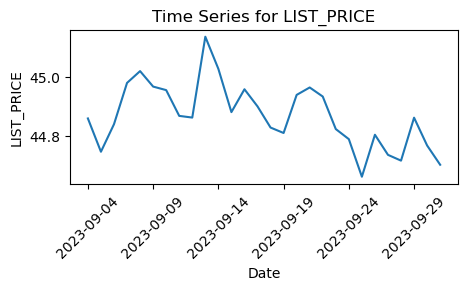

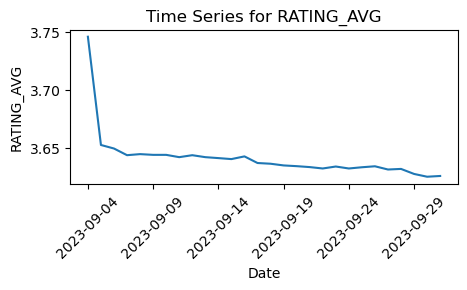

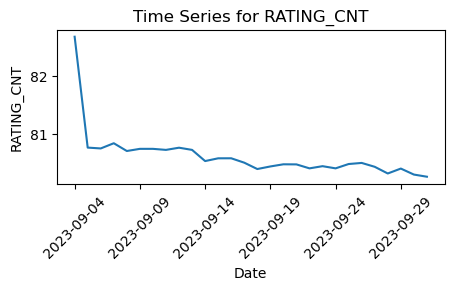

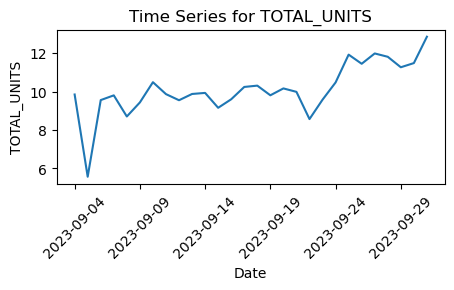

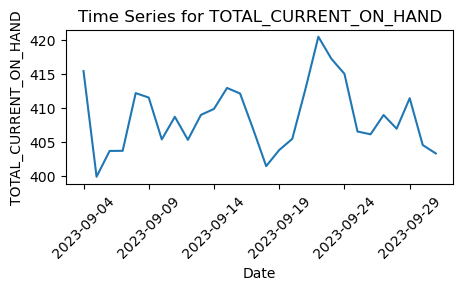

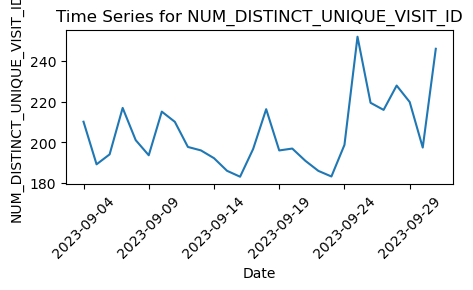

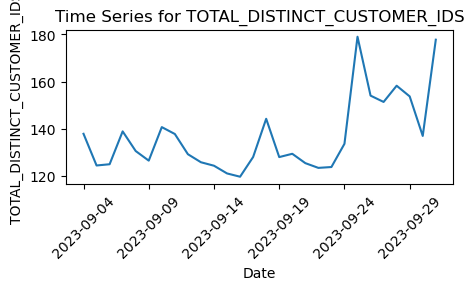

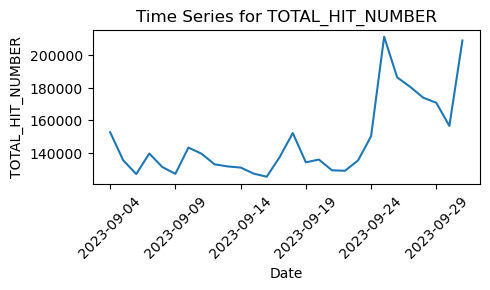

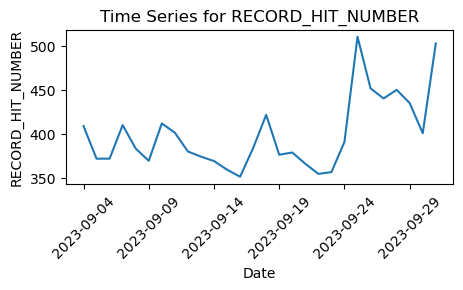

In [8]:
# Create a time series plot for each metric
for metric in metric_cols:
    plt.figure(figsize=(5, 2))
    one_week_data.groupby('PRICE_SNAPSHOT_DATE')[metric].mean().plot()
    plt.title(f'Time Series for {metric}')
    plt.xlabel('Date')
    plt.ylabel(metric)
    # Retrieve current y-axis labels
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]

    # Set the y-axis labels with a 45-degree rotation
    plt.gca().set_xticklabels(labels, rotation=45)

    plt.show()

### Segmentation Analysis

Segment the data based on `MERCH_CLASSIFICATION3`.

In [9]:
one_week_data.columns

Index(['PRICE_SNAPSHOT_DATE', 'CATEGORY_LEVEL1', 'CATEGORY_LEVEL2',
       'CATEGORY_LEVEL3', 'MERCH_CLASSIFICATION1', 'MERCH_CLASSIFICATION2',
       'MERCH_CLASSIFICATION3', 'LIST_PRICE', 'RATING_AVG', 'RATING_CNT',
       'PRODUCT_PART_NUMBER', 'TOTAL_UNITS', 'TOTAL_CURRENT_ON_HAND',
       'NUM_DISTINCT_UNIQUE_VISIT_ID', 'TOTAL_DISTINCT_CUSTOMER_IDS',
       'TOTAL_HIT_NUMBER', 'RECORD_HIT_NUMBER'],
      dtype='object')

In [10]:
# Group by MERCH_CLASSIFICATION3 and aggregate
segmentation_analysis = one_week_data.groupby(['PRICE_SNAPSHOT_DATE', 'MERCH_CLASSIFICATION3']).agg({
    'TOTAL_UNITS': 'sum',
    'LIST_PRICE': 'mean',
    'RATING_AVG': 'mean',
    'TOTAL_CURRENT_ON_HAND': 'sum',
    'RATING_CNT': 'mean',
    'NUM_DISTINCT_UNIQUE_VISIT_ID': 'mean',
    'TOTAL_DISTINCT_CUSTOMER_IDS': 'mean',
    'TOTAL_HIT_NUMBER': 'mean',
    'RECORD_HIT_NUMBER': 'mean'
})

# Sort by a metric, like TOTAL_UNITS
segmentation_analysis = segmentation_analysis.sort_values(by='TOTAL_UNITS', ascending=False)

segmentation_analysis


,,TOTAL_UNITS,LIST_PRICE,RATING_AVG,TOTAL_CURRENT_ON_HAND,RATING_CNT,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER
PRICE_SNAPSHOT_DATE,MERCH_CLASSIFICATION3,,,,,,,,,
2023-10-01,Wet Food,24900.0,41.690212,3.441214,721937,61.930219,221.234181,168.997635,214737.210526,472.616203
2023-09-27,Wet Food,23240.0,41.699808,3.452983,761944,62.407451,204.662921,153.354228,186656.903607,426.816677
2023-09-25,Wet Food,23004.0,41.854837,3.460258,765622,62.768961,236.324387,178.101517,218649.020420,489.568261
2023-09-28,Wet Food,22822.0,41.649653,3.452441,758265,62.190053,198.811131,149.034340,176666.244523,413.756069
2023-09-30,Wet Food,22586.0,41.722822,3.441214,738978,61.930219,182.060911,133.777646,166458.947960,385.998226
...,...,...,...,...,...,...,...,...,...,...
2023-09-04,Dry Food Toppings,85.0,17.933810,3.089496,4896,15.541667,554.833333,436.166667,251939.041667,783.625000
2023-09-23,Dry Food Toppings,84.0,19.135600,2.612425,4059,13.357143,221.785714,143.107143,126472.607143,337.214286
2023-09-05,Dry Food Toppings,76.0,17.933810,3.089496,4582,15.541667,297.083333,206.458333,169690.000000,465.875000


In [11]:
# save data
saved_segment_group_data = segmentation_analysis
saved_segment_group_data_file_path = get_absolute_path(
    'segment_group_data.csv',
    'data/_small_set_sales_by_date_sku_zip',
    PROJECT_BASE_DIR
)

segmentation_analysis.to_csv(saved_segment_group_data_file_path)

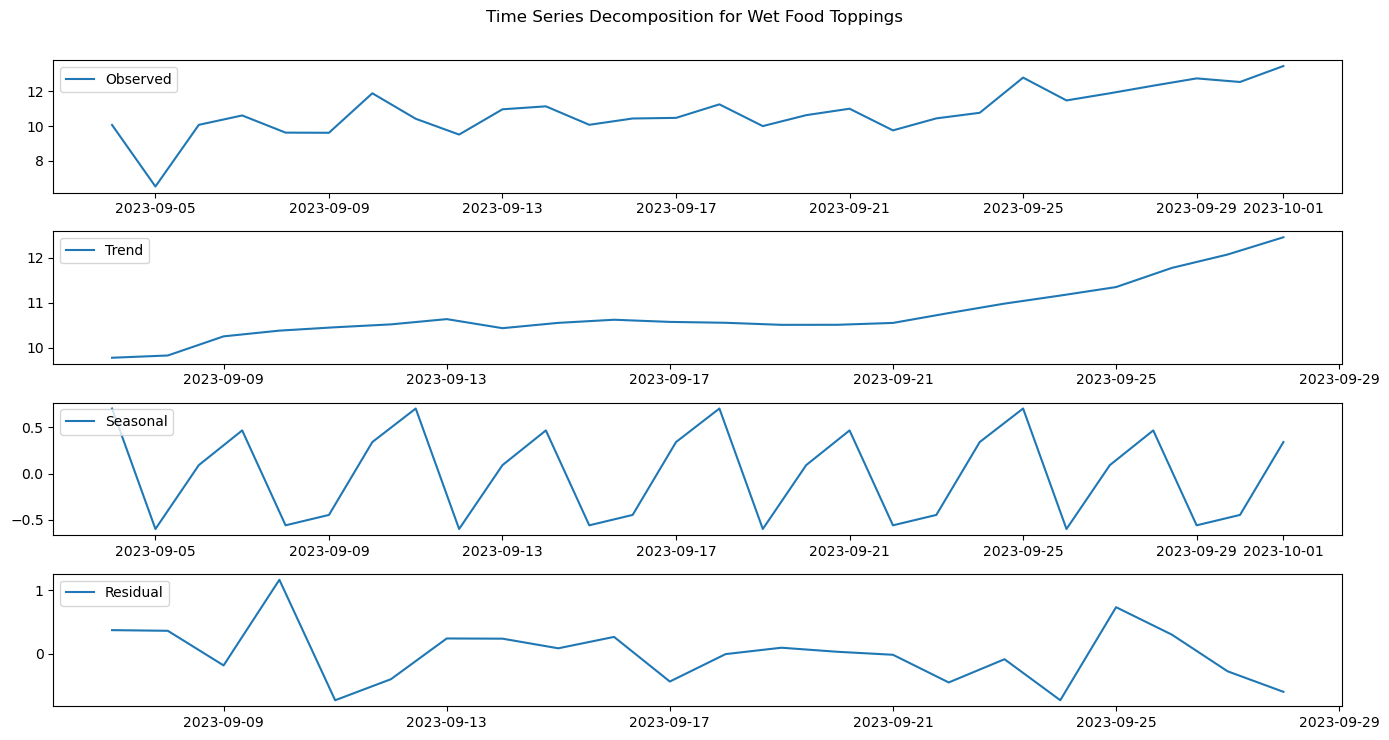

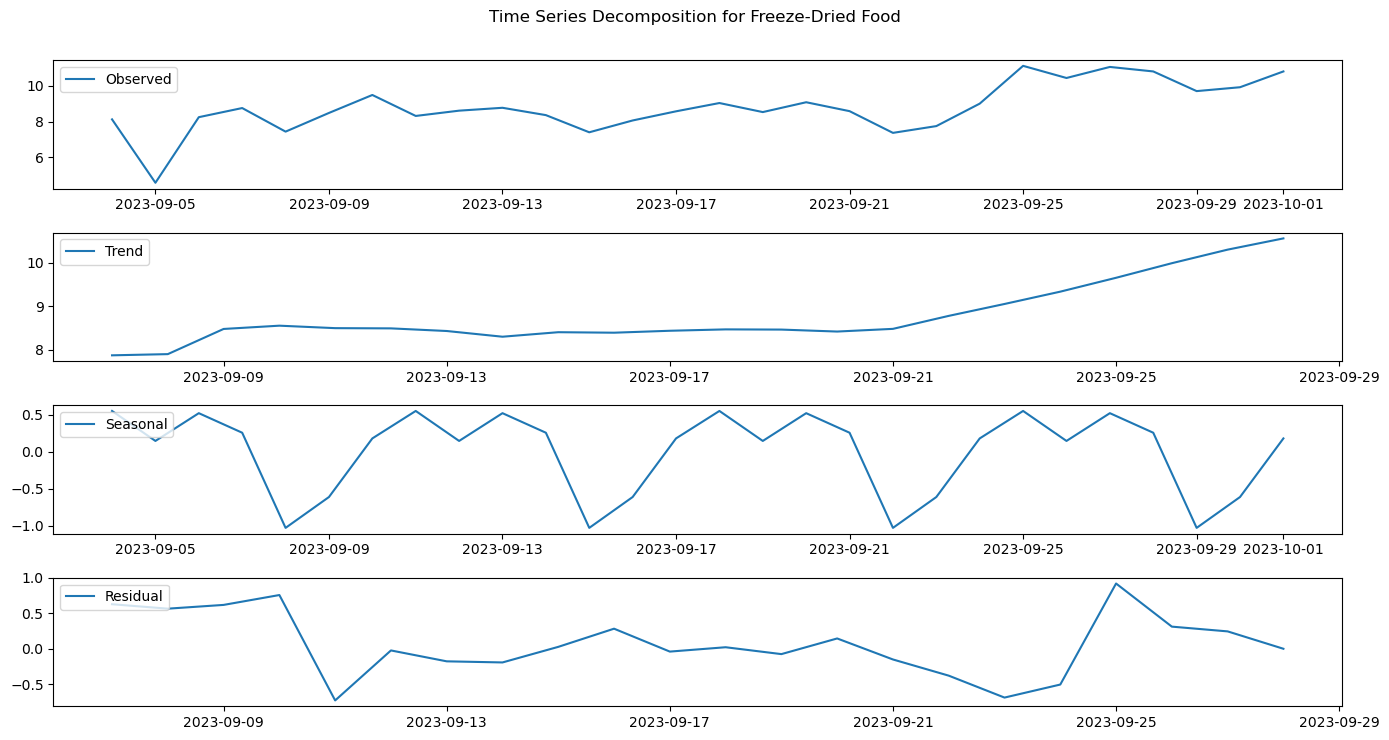

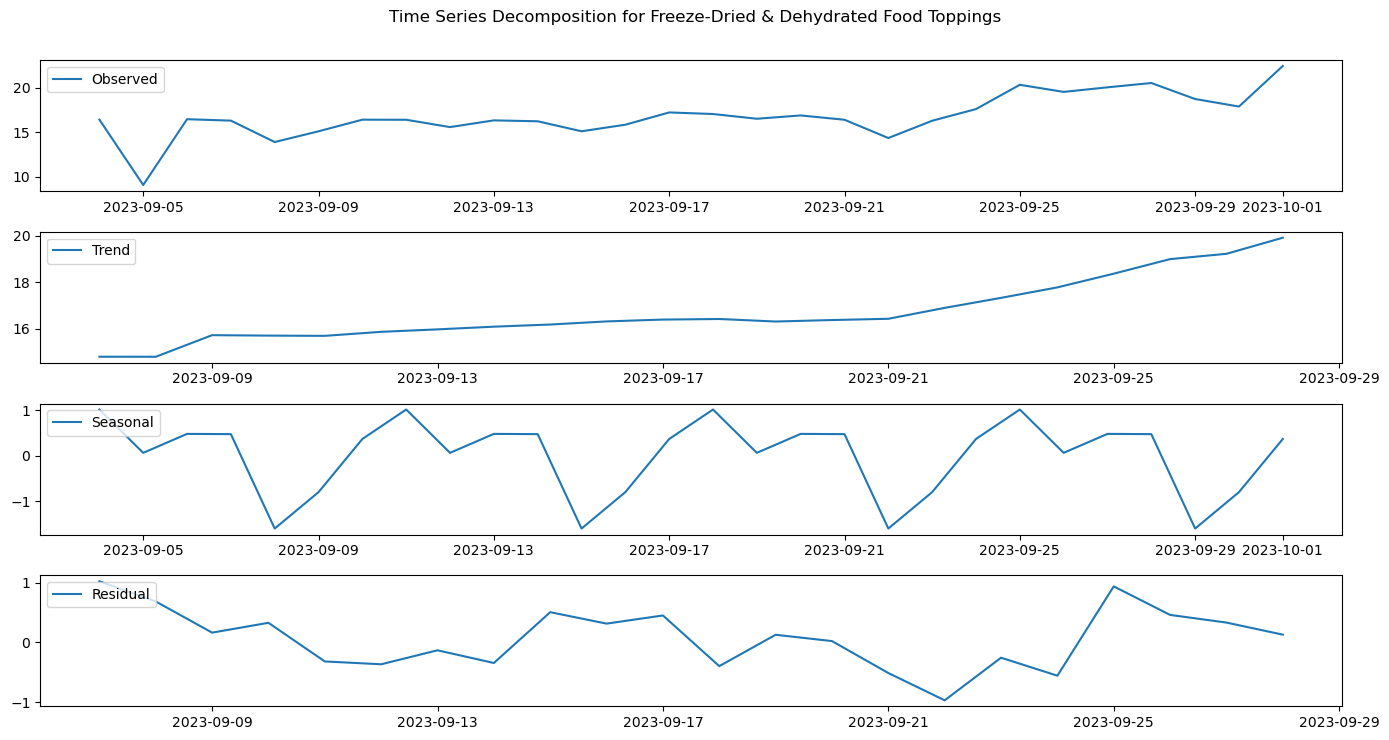

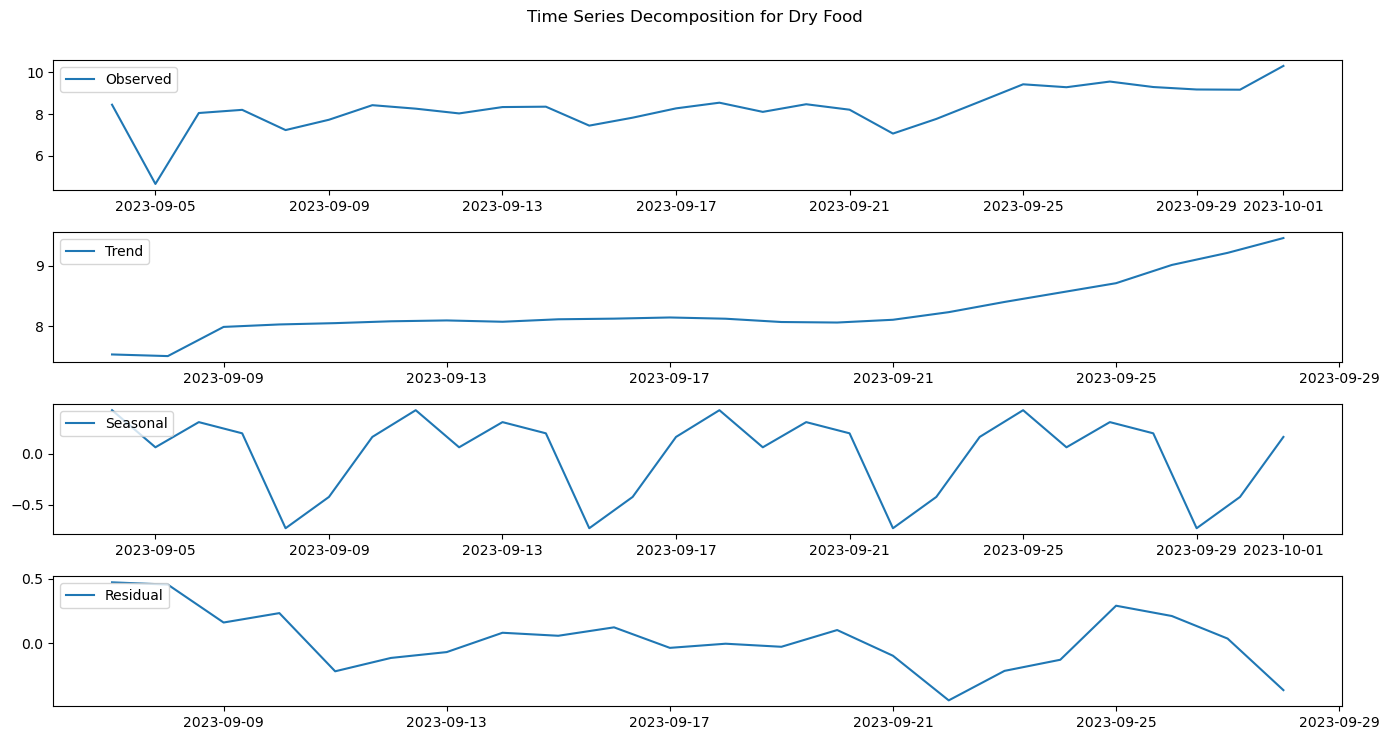

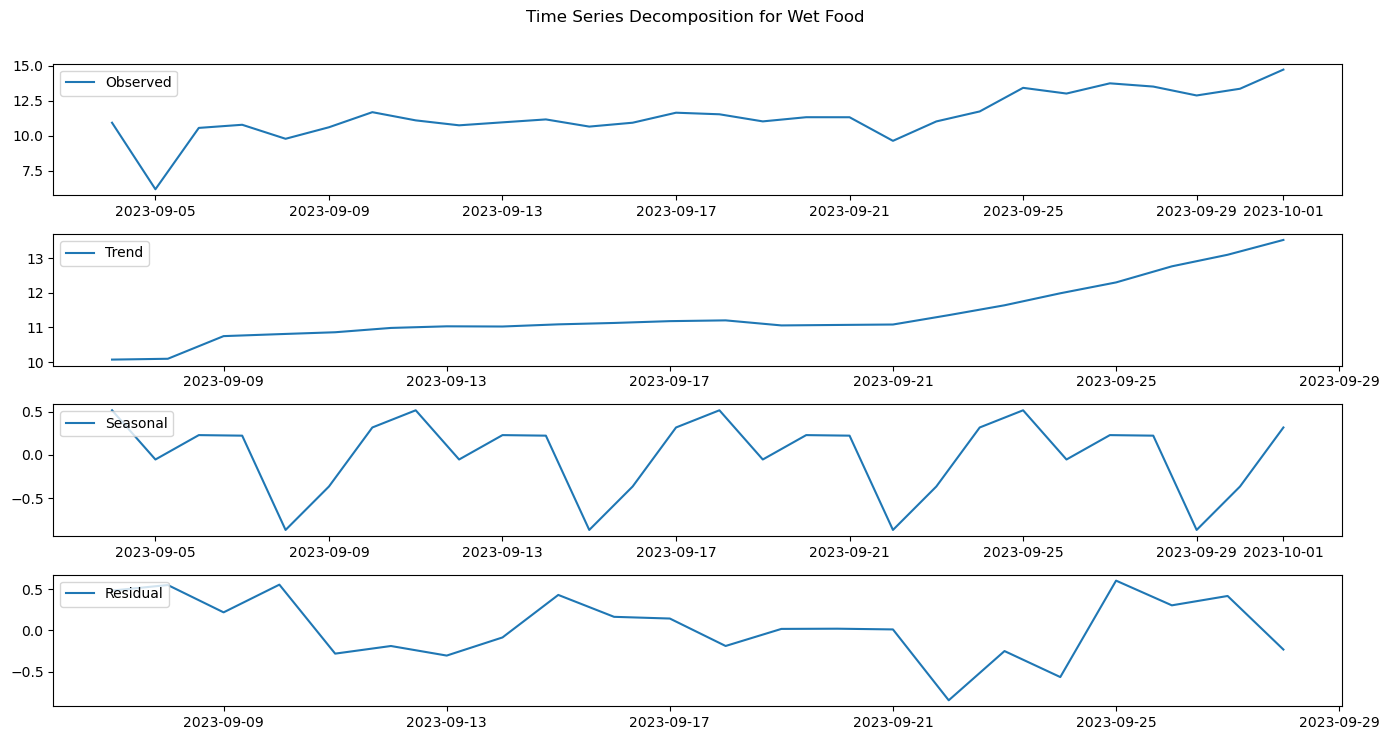

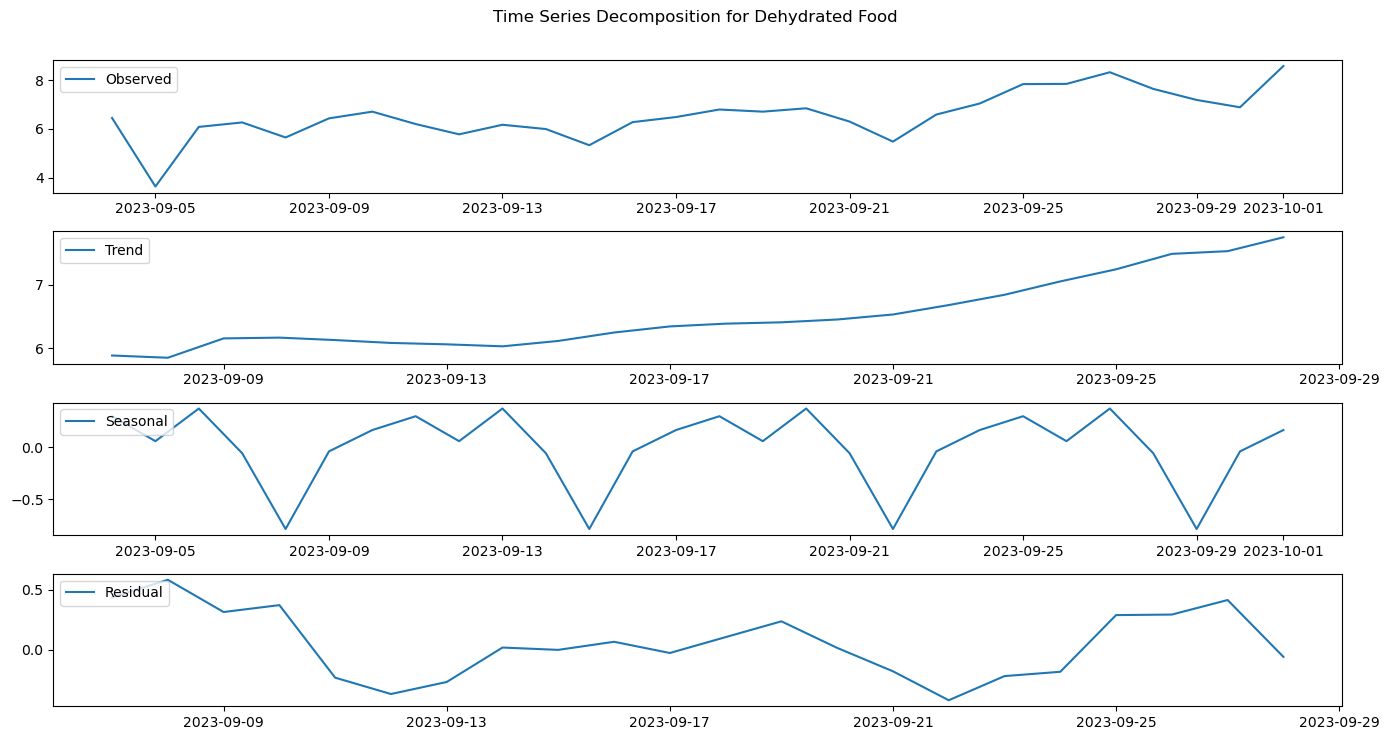

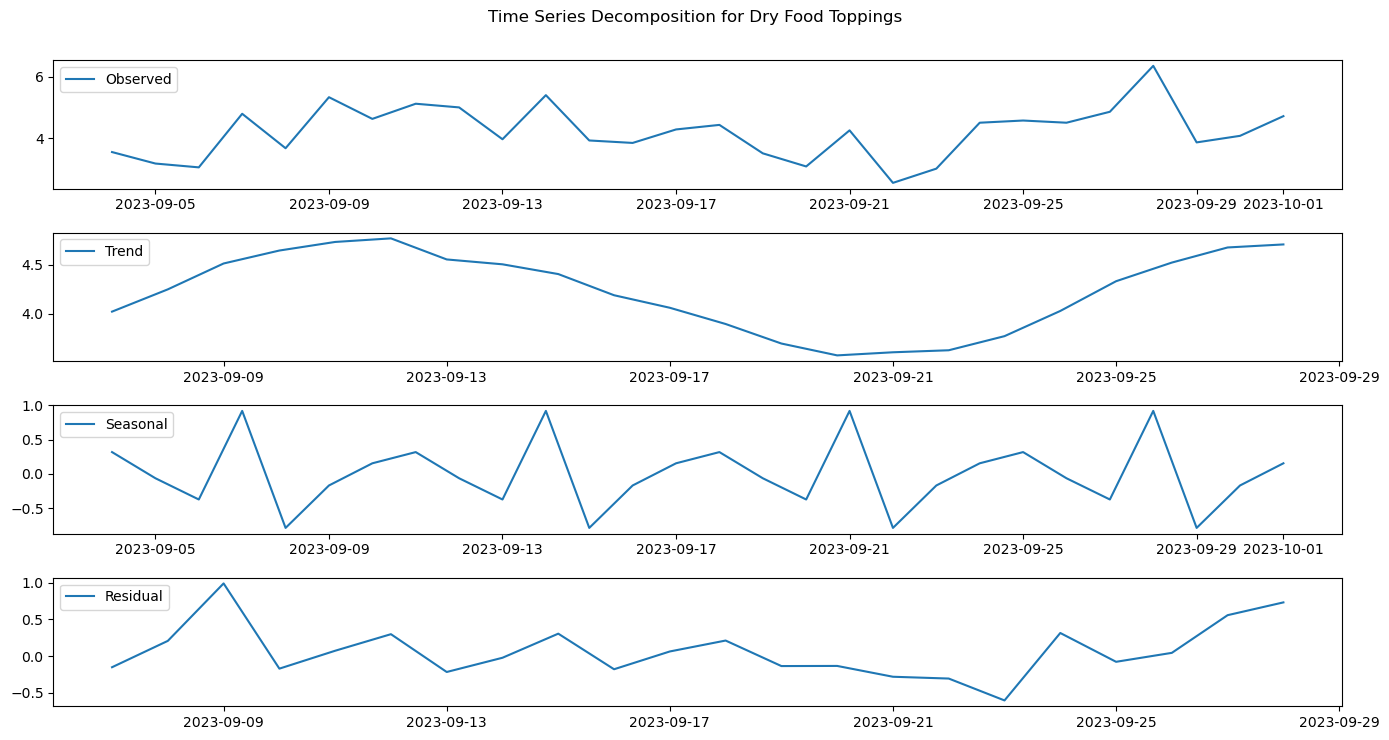

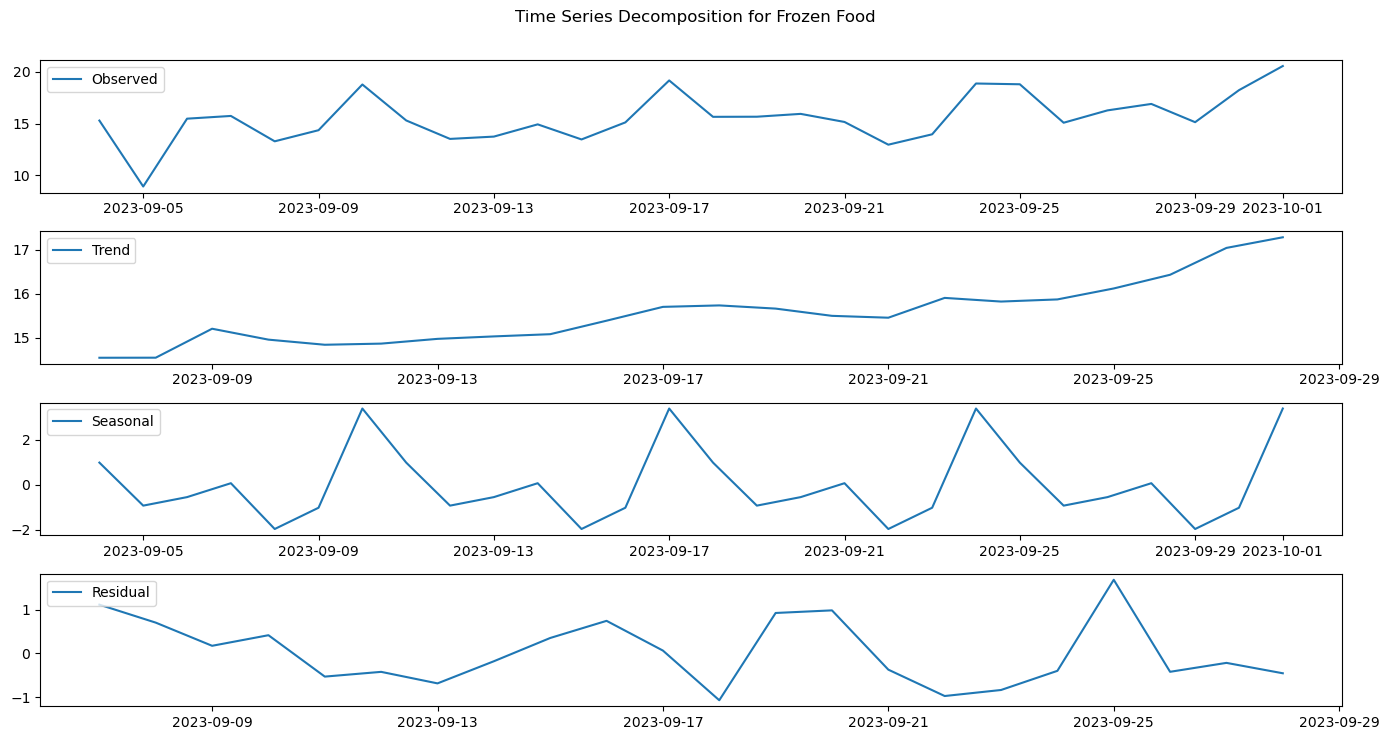

In [18]:
## Not useful for 1 week data; do it when we have at least 1 month data

# Convert the date column to datetime and set it as the index
one_week_data['PRICE_SNAPSHOT_DATE'] = pd.to_datetime(one_week_data['PRICE_SNAPSHOT_DATE'])
one_week_data.set_index('PRICE_SNAPSHOT_DATE', inplace=True)

# Iterate through each segment and apply time series decomposition
for segment in one_week_data['MERCH_CLASSIFICATION3'].unique():
    segment_data = one_week_data[one_week_data['MERCH_CLASSIFICATION3'] == segment]
    
    # Choosing an example metric for decomposition, e.g., 'TOTAL_UNITS'
    ts_data = segment_data['TOTAL_UNITS'].resample('D').mean()  # Resample to daily data
    
    # Decompose the time series
    decomposition = seasonal_decompose(ts_data.dropna(), model='additive', period=7)  # Adjust 'period' as needed

    # Plotting the decomposed time series
    plt.figure(figsize=(14, 7))
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.suptitle(f'Time Series Decomposition for {segment}', y=1.05)
    plt.show()


### Correlation Analysis

Examine the correlation between different numeric metrics.

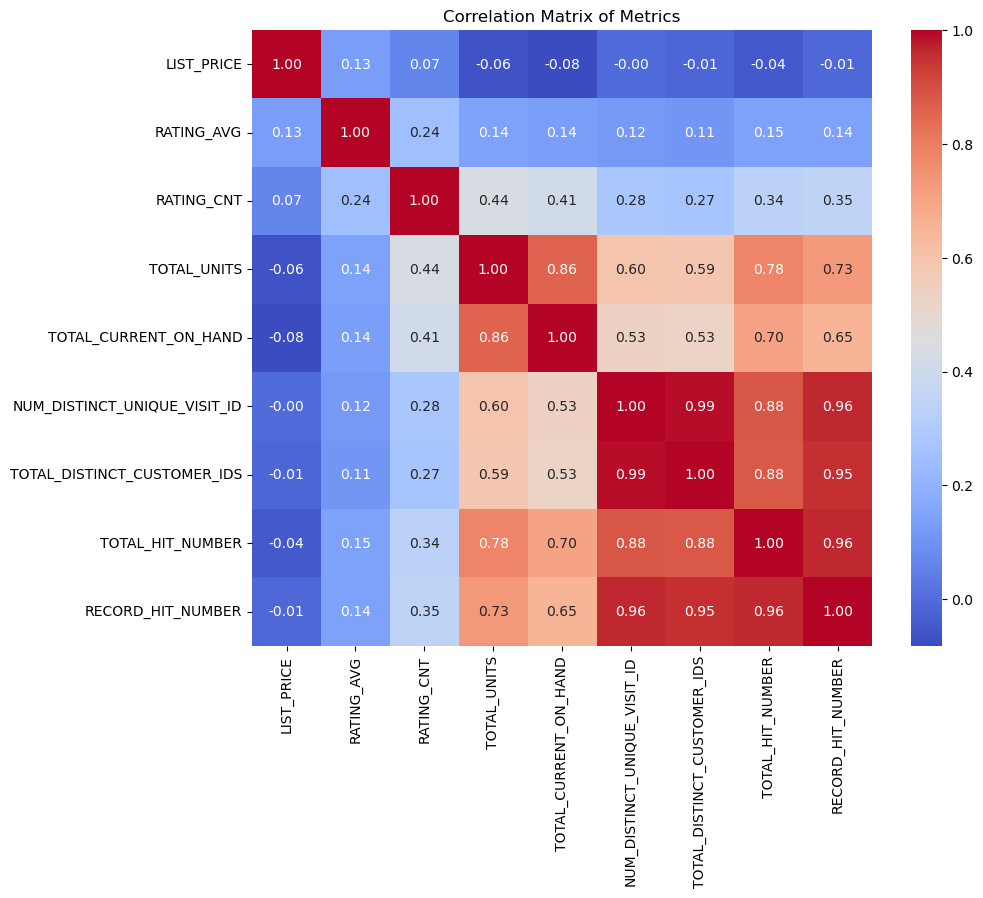

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named updated_one_week_data
metric_cols = [
    'LIST_PRICE', 'RATING_AVG', 'RATING_CNT',
    'TOTAL_UNITS', 'TOTAL_CURRENT_ON_HAND',
    'NUM_DISTINCT_UNIQUE_VISIT_ID', 'TOTAL_DISTINCT_CUSTOMER_IDS',
    'TOTAL_HIT_NUMBER', 'RECORD_HIT_NUMBER'
]

# Selecting only the metric columns for correlation analysis
metric_data = one_week_data[metric_cols]

# Calculating the correlation matrix
correlation_matrix = metric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Metrics")
plt.show()


The correlation matrix provided shows the relationship between different metrics in your dataset. Here's a summary of the key insights:

1. Sales Volume Correlations (TOTAL_UNITS):

- There is a strong positive correlation between `TOTAL_UNITS` and TOTAL_CURREN`T_ON_HAND (0.86), indicating that higher sales volumes are associated with higher stock levels.
- `TOTAL_UNITS` also shows strong positive correlations with `TOTAL_HIT_NUMBER` and `RECORD_HIT_NUMBER` (0.78 and 0.73, respectively), suggesting that products with more views and interactions tend to sell better.
- There is a moderate positive correlation between `TOTAL_UNITS` and `RATING_CNT` (0.44), implying that products with more ratings tend to have higher sales, although this relationship is not as strong as with stock levels and hit numbers.

2. Customer Interaction Metrics:

- `NUM_DISTINCT_UNIQUE_VISIT_ID` and `TOTAL_DISTINCT_CUSTOMER_IDS` are almost perfectly correlated with each other (0.99), indicating that the number of unique visits is almost identical to the number of distinct customers, which could mean that most visits result in a purchase or each customer typically visits only once.
- These customer interaction metrics also show high correlations with `TOTAL_HIT_NUMBER` and `RECORD_HIT_NUMBER` (around 0.88 to 0.96), meaning that more visits and unique customers lead to higher interactions with product listings.

3. Ratings Metrics (`RATING_AVG` and `RATING_CNT`):

- `RATING_AVG` has a low to moderate correlation with `TOTAL_UNITS` and `RATING_CNT` (0.14 and 0.24, respectively), suggesting that average rating is less strongly associated with sales volume and rating count compared to other metrics.
- `RATING_CNT` has a moderate correlation with `TOTAL_UNITS` (0.44), which could indicate that products with more ratings tend to sell better, possibly due to higher visibility or perceived credibility.

3. Stock Levels (`TOTAL_CURRENT_ON_HAND`):

- `TOTAL_CURRENT_ON_HAND` has a strong positive correlation with `TOTAL_UNITS` (0.86), as mentioned earlier, which could indicate effective inventory management aligning stock with sales demand.

4. Weak Correlations with List Price (LIST_PRICE):

- `LIST_PRICE` shows only weak correlations with other metrics, the strongest being with `RATING_AVG` (0.13). This might suggest that pricing strategy is not the dominant factor driving these other metrics, or that your range of prices is not wide enough to show a stronger effect.

In [17]:
# Based on above statement
# I decided the final metrics
metric_cols = [
    'LIST_PRICE', 'RATING_AVG', 'RATING_CNT'
    , 'TOTAL_UNITS', 'TOTAL_CURRENT_ON_HAND'
    # , 'NUM_DISTINCT_UNIQUE_VISIT_ID', 
    , 'TOTAL_DISTINCT_CUSTOMER_IDS'
    , 'RECORD_HIT_NUMBER'
]

**Notes Dec/14:**

1 snapshot



No more dims

Why is it important

Identify only a few data points as example;
- Why anomalous
- Try find the root cause
  - The contribution of each dimension for ONE SAMPLE point


2nd dimensions to "rank":

Focus on the revenue-driven SKUs.


Top 10 SKUs

Score;
behaviors;
cause;

Give the business revenue;


End of month; there will be a peak; 




### Exploratory 'Outlier / Anomaly' Results

In [14]:
## Statsitical Methods

from scipy import stats

# Example using Z-Score
metrics = one_week_data[metric_cols]
z_scores = stats.zscore(metrics)
anomalies = metrics[(z_scores.abs() > 3).all(axis=1)]
anomalies

,LIST_PRICE,RATING_AVG,RATING_CNT,TOTAL_UNITS,TOTAL_CURRENT_ON_HAND,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER


In [15]:
## Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
import numpy as np
# Loop through each metric and perform seasonal decomposition
for _metric in metric_cols:
    print(_metric)

    # Handle NaN values (choose a method that fits your data)
    time_series = one_week_data[_metric].dropna()  # Example method: dropping NaN values

    # Ensure that the time_series has a DateTime index if necessary
    # one_week_data.index = pd.to_datetime(one_week_data.index)

    decomposition = seasonal_decompose(time_series, model='additive', period=7)
    residuals = decomposition.resid.dropna()  # Drop NaN which might be created by the decomposition
    anomalies = residuals[(np.abs(zscore(residuals)) > 3)]  # Use zscore from scipy.stats

    print(len(anomalies))
    print(len(anomalies) / len(time_series) * 100)

LIST_PRICE
2575
2.4718971690777662
RATING_AVG
1724
1.4307291407326264
RATING_CNT
1743
1.4464970372952248
TOTAL_UNITS
2135
1.771813640060416
TOTAL_CURRENT_ON_HAND
1524
1.2647512821789573
NUM_DISTINCT_UNIQUE_VISIT_ID
499
0.41411475709140405
TOTAL_DISTINCT_CUSTOMER_IDS
475
0.3941974140649638
TOTAL_HIT_NUMBER
1513
1.2556224999585055
RECORD_HIT_NUMBER
869
0.7211737954156915


In [16]:
## ML

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Replace 'metrics' with the DataFrame containing your metric columns
# Impute NaN values using the mean of each column
imputer = SimpleImputer(strategy='mean')
metrics_imputed = imputer.fit_transform(metrics)

# Now apply Isolation Forest on the imputed data
iso_forest = IsolationForest(n_estimators=100)
predictions = iso_forest.fit_predict(metrics_imputed)

# Convert the imputed array back to a DataFrame and add the predictions
metrics_df = pd.DataFrame(metrics_imputed, columns=metrics.columns)
metrics_df['anomaly'] = predictions

# Filter the anomalies (where prediction is -1)
anomalies = metrics_df[metrics_df['anomaly'] == -1]
anomalies


,LIST_PRICE,RATING_AVG,RATING_CNT,TOTAL_UNITS,TOTAL_CURRENT_ON_HAND,NUM_DISTINCT_UNIQUE_VISIT_ID,TOTAL_DISTINCT_CUSTOMER_IDS,TOTAL_HIT_NUMBER,RECORD_HIT_NUMBER,anomaly
7110,102.99,4.4792,144.0,16.0,524.0,582.0,345.0,438456.0,1149.0,-1
7111,102.99,4.4792,144.0,19.0,690.0,591.0,333.0,344049.0,1042.0,-1
7114,102.99,4.4792,144.0,27.0,733.0,517.0,320.0,353711.0,1046.0,-1
7116,102.99,4.4792,144.0,28.0,693.0,437.0,256.0,440993.0,1017.0,-1
7119,102.99,4.4792,144.0,28.0,797.0,410.0,262.0,380437.0,930.0,-1
...,...,...,...,...,...,...,...,...,...,...
119988,35.99,4.4590,183.0,32.0,822.0,707.0,493.0,516406.0,1349.0,-1
119989,35.99,4.4590,183.0,33.0,794.0,758.0,541.0,557491.0,1401.0,-1
119990,35.99,4.4590,183.0,29.0,869.0,800.0,574.0,577385.0,1481.0,-1
119992,35.99,4.4590,183.0,49.0,832.0,631.0,447.0,463200.0,1132.0,-1
